In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Copy of Influencer - Influencer.csv")

In [ ]:
df.head

<bound method NDFrame.head of      Rank           Channel Info  Influence Score Followers Avg. Likes Posts  \
0       1            \ncristiano               92    485.2m       8.7m  3.4k   
1       2            kyliejenner               91    370.7m       8.2m  7.0k   
2       3             \nleomessi               90    363.9m       6.7m   915   
3       4          \nselenagomez               93    348.8m       6.1m  1.9k   
4       5              \ntherock               91    339.4m       1.8m  6.8k   
..    ...                    ...              ...       ...        ...   ...   
195   196  \nkhabib_nurmagomedov               63     33.6m     680.6k  4.6k   
196   197         \ndanbilzerian               84     33.6m       2.2m  1.4k   
197   198            \nraisa6690               80     33.6m     227.8k  4.2k   
198   199          \nluansantana               79     33.5m     193.3k   865   
199   200           \nnancyajram               81     33.4m     382.5k  3.8k   

     60-D

In [ ]:
def convert_to_numeric(value):
    if 'm' in value:
        return float(value.replace('m', '')) * 1e6
    if 'k' in value:
        return float(value.replace('k',''))*1e3
    if 'b' in value:
        return float(value.replace('b',''))*1e9
    else:
        return float(value)

In [ ]:
df['Followers'] = df['Followers'].apply(convert_to_numeric)
df['Avg. Likes'] =df['Avg. Likes'].apply(convert_to_numeric)
df['Total Likes'] = df['Total Likes'].apply(convert_to_numeric)


In [ ]:

# Assuming you have your dataset loaded into a DataFrame, let's call it 'df'
# If not, you can load it using pd.read_csv('your_dataset.csv') or any appropriate method

# Example DataFrame creation (replace this with your actual DataFrame)


# Calculate correlation matrix
correlation_matrix = df.corr()

# Find highly correlated pairs
highly_correlated_pairs = (correlation_matrix.abs() > 0.8) & (correlation_matrix.abs() < 1)

# Extract the pairs with high correlation
highly_correlated_features = [(feature1, feature2, correlation_matrix.loc[feature1, feature2])
                              for feature1 in df.columns
                              for feature2 in df.columns
                              if feature1 in highly_correlated_pairs.columns and feature2 in highly_correlated_pairs.columns and highly_correlated_pairs.loc[feature1, feature2]]

# Display the highly correlated pairs and their correlation coefficients
for feature1, feature2, correlation_coefficient in highly_correlated_features:
    print(f"{feature1} and {feature2} are highly correlated with a coefficient of {correlation_coefficient}")


<ipython-input-13-a72b86661572>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
highly_correlated_pairs

,Rank,Influence Score,60-Day Eng Rate
Rank,False,False,False
Influence Score,False,False,False
60-Day Eng Rate,False,False,False


In [ ]:
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame, let's call it 'df'
# If not, you can load it using pd.read_csv('your_dataset.csv') or any appropriate method


# Frequency distribution of Influence Score
influence_score_distribution = df['Influence Score'].value_counts()

# Frequency distribution of Followers
followers_distribution = df['Followers'].value_counts()

# Frequency distribution of Posts
posts_distribution = df['Posts'].value_counts()

# Display the results
print("Frequency distribution of Influence Score:")
print(influence_score_distribution)
print("\nFrequency distribution of Followers:")
print(followers_distribution)
print("\nFrequency distribution of Posts:")
print(posts_distribution)


Frequency distribution of Influence Score:
85    30
83    20
86    19
84    18
82    12
80    12
87     9
81     9
90     7
88     7
76     6
79     6
91     6
78     5
77     4
92     4
75     4
89     4
74     3
73     2
42     2
70     1
93     1
22     1
57     1
58     1
47     1
72     1
68     1
41     1
71     1
63     1
Name: Influence Score, dtype: int64

Frequency distribution of Followers:
36.0m    3
33.6m    3
68.1m    3
33.8m    3
52.9m    3
        ..
64.7m    1
64.4m    1
63.6m    1
63.4m    1
33.4m    1
Name: Followers, Length: 172, dtype: int64

Frequency distribution of Posts:
10.0k    11
1.2k      9
1.9k      5
2.0k      5
9.9k      4
         ..
899       1
290       1
10.1k     1
8.2k      1
3.8k      1
Name: Posts, Length: 121, dtype: int64


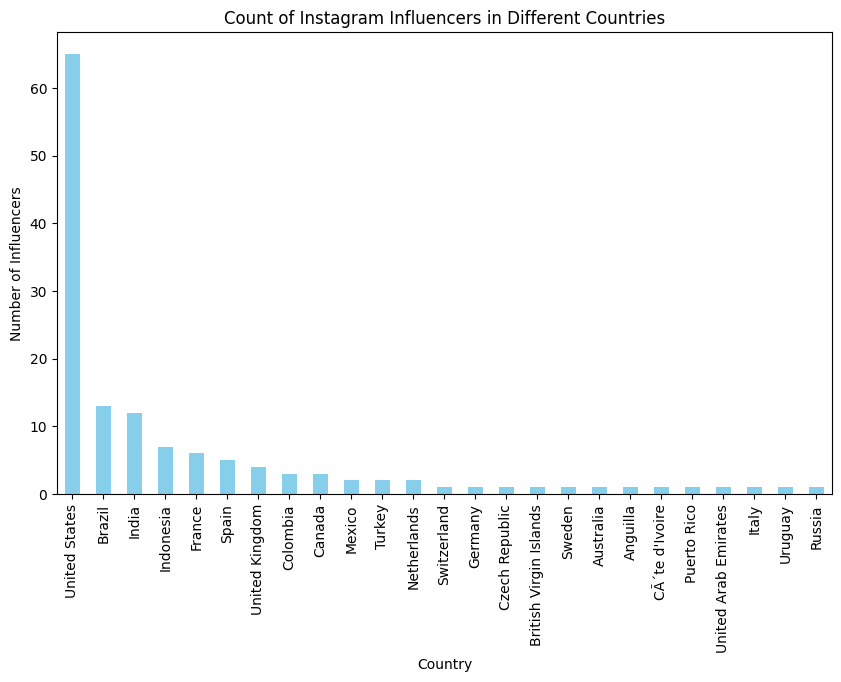

In [ ]:
country_counts = df['Country Or Region'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Instagram Influencers in Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

In [ ]:
top_10_followers = df.nlargest(10, 'Followers')

# Top 10 influencers based on Average Likes
top_10_avg_likes = df.nlargest(10, 'Avg. Likes')

# Top 10 influencers based on Total Likes
top_10_total_likes = df.nlargest(10, 'Total Likes')

# Display the results
print("Top 10 Influencers based on Followers:")
print(top_10_followers[['Channel Info', 'Followers']])

print("\nTop 10 Influencers based on Average Likes:")
print(top_10_avg_likes[['Channel Info', 'Followers']])

print("\nTop 10 Influencers based on Total Likes:")
print(top_10_total_likes[['Channel Info', 'Followers']])

Top 10 Influencers based on Followers:
        Channel Info    Followers
0        \ncristiano  485200000.0
1        kyliejenner  370700000.0
2         \nleomessi  363900000.0
3      \nselenagomez  348800000.0
4          \ntherock  339400000.0
5     \narianagrande  333000000.0
6    \nkimkardashian  330700000.0
7          \nbeyonce  276100000.0
8  \nkhloekardashian  273900000.0
9     \njustinbieber  260000000.0

Top 10 Influencers based on Average Likes:
       Channel Info    Followers
96            \nthv   51700000.0
131           \nj.m   44200000.0
165         \nrkive   38400000.0
0       \ncristiano  485200000.0
32   \nbillieeilish  106400000.0
1       kyliejenner  370700000.0
2        \nleomessi  363900000.0
3     \nselenagomez  348800000.0
38   \nlalalalisa_m   82600000.0
22        \nzendaya  153300000.0

Top 10 Influencers based on Total Likes:
       Channel Info    Followers
1       kyliejenner  370700000.0
0       \ncristiano  485200000.0
22        \nzendaya  153300000.0
6   \n

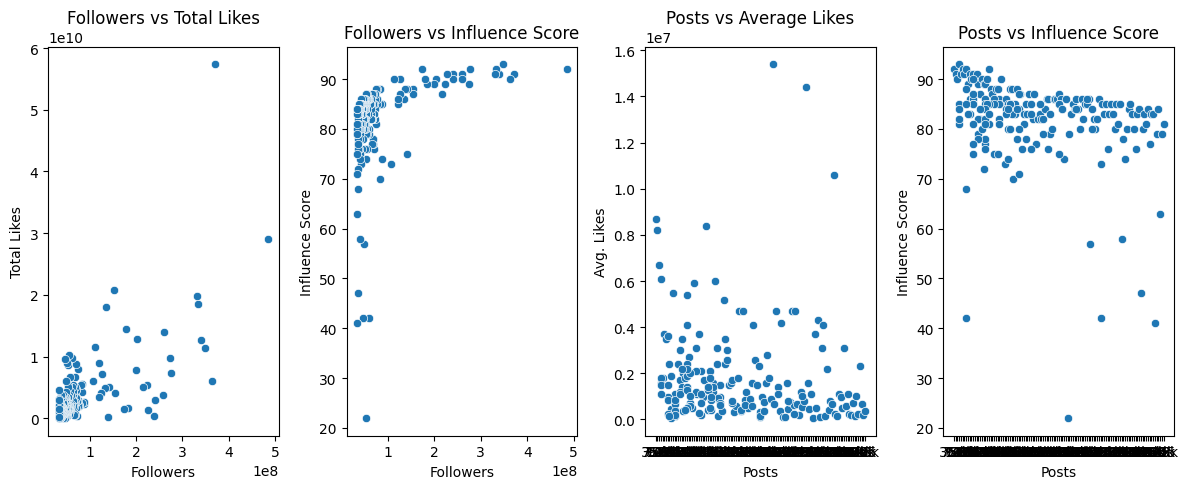

In [ ]:

# Scatter plot - Followers and Total Likes
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
sns.scatterplot(x='Followers', y='Total Likes', data=df)
plt.title('Followers vs Total Likes')

# Scatter plot - Followers and Influence Score
plt.subplot(1, 4, 2)
sns.scatterplot(x='Followers', y='Influence Score', data=df)
plt.title('Followers vs Influence Score')

# Scatter plot - Posts and Average Likes
plt.subplot(1, 4, 3)
sns.scatterplot(x='Posts', y='Avg. Likes', data=df)
plt.title('Posts vs Average Likes')

# Scatter plot - Posts and Influence Score
plt.subplot(1, 4, 4)
sns.scatterplot(x='Posts', y='Influence Score', data=df)
plt.title('Posts vs Influence Score')

plt.tight_layout()
plt.show()
